In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [5]:
from keras.utils import np_utils

# one-hot encoding

In [6]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

# model_1: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: SGD(lr=0.5)
# Normalization: NO

In [8]:
model_1 = Sequential()
model_1.add(Dense(20, input_dim=784))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(20, input_dim=784))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.compile(loss='mse',optimizer=SGD(lr=0.5),metrics=['acc'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [9]:
MODEL1 = model_1.fit(x_train,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.0846 - acc: 0.3155 - val_loss: 0.0769 - val_acc: 0.4336
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0679 - acc: 0.5075 - val_loss: 0.0589 - val_acc: 0.5737
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0519 - acc: 0.6488 - val_loss: 0.0453 - val_acc: 0.7055
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0409 - acc: 0.7407 - val_loss: 0.0359 - val_acc: 0.8179
Epoch 5/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0335 - acc: 0.8214 - val_loss: 0.0300 - val_acc: 0.8449
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0283 - acc: 0.8413 - val_loss: 0.0252 - val_acc: 0.8559
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0257 - acc: 0.8495 - val_loss: 0.0243 - val_acc

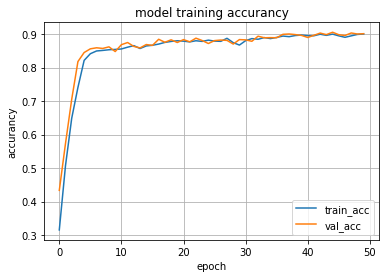

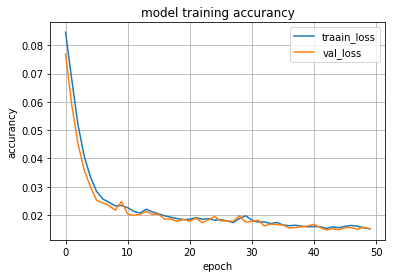

In [12]:
plt.plot(MODEL1.history['acc'])
plt.plot(MODEL1.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL1.history['loss'])
plt.plot(MODEL1.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

In [13]:
y_predict = model_1.predict_classes(x_test)
y_predict = np_utils.to_categorical(y_predict,10)

In [14]:
from sklearn.metrics import confusion_matrix

# model_1 confusion_matrix

In [15]:
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 944,    0,    3,    1,    0,   14,   11,    3,    4,    0],
       [   0, 1104,    7,    4,    0,    2,    3,    5,   10,    0],
       [  15,    4,  921,   13,   10,    1,   20,   21,   25,    2],
       [   3,    3,   53,  862,    0,   25,    2,   16,   42,    4],
       [   1,    0,   14,    0,  834,    1,   23,    4,   16,   89],
       [  18,    4,    4,   41,    7,  739,   23,    3,   42,   11],
       [  13,    2,    7,    2,    4,   14,  908,    1,    7,    0],
       [   5,   10,   25,   10,    3,    4,    1,  945,    4,   21],
       [   6,    6,   13,   16,    4,   17,   26,    9,  865,   12],
       [   6,    3,    5,    9,   35,    7,    4,   27,   24,  889]],
      dtype=int64)

# Normalization

In [16]:
x_train_n = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_n = (x_test - x_test.min())/(x_test.max() - x_test.min())

# model_2: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: SGD(lr=0.5)
# Normalization: Yes

In [17]:
model_2 = Sequential()
model_2.add(Dense(20, input_dim=784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(20, input_dim=784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))
model_2.compile(loss='mse',optimizer=SGD(lr=0.5),metrics=['acc'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_5 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [18]:
MODEL2 = model_2.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0901 - acc: 0.1203 - val_loss: 0.0890 - val_acc: 0.1483
Epoch 2/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0882 - acc: 0.1915 - val_loss: 0.0869 - val_acc: 0.2248
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0842 - acc: 0.2399 - val_loss: 0.0806 - val_acc: 0.3082
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0781 - acc: 0.3551 - val_loss: 0.0750 - val_acc: 0.3957
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0715 - acc: 0.4199 - val_loss: 0.0668 - val_acc: 0.4530
Epoch 6/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0629 - acc: 0.4833 - val_loss: 0.0586 - val_acc: 0.5295
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0557 - acc: 0.5748 - val_loss: 0.0522 - val_acc

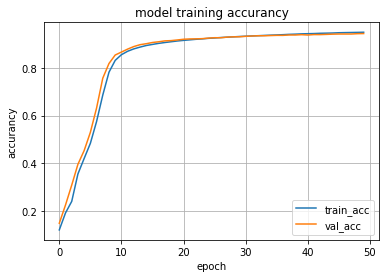

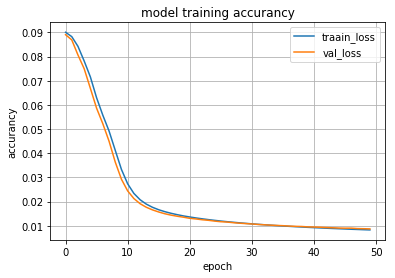

In [19]:
plt.plot(MODEL2.history['acc'])
plt.plot(MODEL2.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL2.history['loss'])
plt.plot(MODEL2.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_2 confusion_matrix

In [20]:
y_predict = model_2.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 965,    0,    0,    1,    0,    5,    5,    3,    1,    0],
       [   0, 1114,    3,    3,    1,    1,    2,    2,    9,    0],
       [  12,    5,  962,   11,    7,    0,   10,    8,   14,    3],
       [   1,    2,   22,  936,    1,   14,    2,   11,   14,    7],
       [   1,    1,    4,    0,  934,    2,   13,    3,    3,   21],
       [  12,    1,    2,   20,    7,  806,   11,    5,   23,    5],
       [   9,    2,    6,    0,    8,    7,  920,    0,    6,    0],
       [   2,    7,   30,    3,    6,    2,    0,  958,    1,   19],
       [   4,    2,    6,   13,   12,    6,   10,    2,  910,    9],
       [   8,    5,    2,    9,   19,    6,    1,   10,   14,  935]],
      dtype=int64)

In [21]:
from keras.optimizers import Adam

# model_3: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Sigmoid
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [22]:
model_3 = Sequential()
model_3.add(Dense(20, input_dim=784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(20, input_dim=784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))
model_3.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_7 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [23]:
MODEL3 = model_3.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0516 - acc: 0.6516 - val_loss: 0.0223 - val_acc: 0.8879
Epoch 2/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0170 - acc: 0.9013 - val_loss: 0.0136 - val_acc: 0.9141
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0126 - acc: 0.9214 - val_loss: 0.0114 - val_acc: 0.9288
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0108 - acc: 0.9320 - val_loss: 0.0103 - val_acc: 0.9363
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0096 - acc: 0.9394 - val_loss: 0.0098 - val_acc: 0.9380
Epoch 6/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0088 - acc: 0.9439 - val_loss: 0.0089 - val_acc: 0.9420
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.0081 - acc: 0.9492 - val_loss: 0.0084 - val_acc

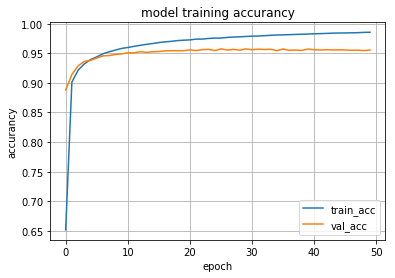

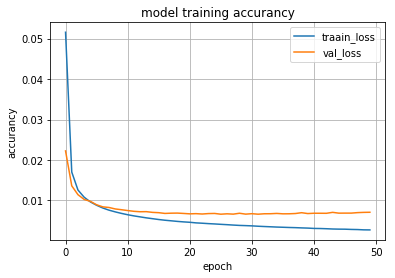

In [24]:
plt.plot(MODEL3.history['acc'])
plt.plot(MODEL3.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL3.history['loss'])
plt.plot(MODEL3.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_3 confusion_matrix

In [25]:
y_predict = model_3.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 955,    0,    4,    0,    3,    4,    7,    5,    2,    0],
       [   0, 1120,    4,    1,    0,    1,    1,    2,    6,    0],
       [  11,    3,  976,   17,    1,    3,    4,   10,    6,    1],
       [   2,    0,    9,  968,    1,   15,    1,    8,    6,    0],
       [   2,    0,    3,    0,  942,    0,   11,    3,    1,   20],
       [   8,    0,    2,   16,    3,  843,    9,    2,    2,    7],
       [   7,    2,    5,    1,    7,    9,  924,    0,    3,    0],
       [   0,    7,   15,    5,    2,    1,    0,  985,    4,    9],
       [   6,    1,   13,   14,    7,   15,    8,    5,  900,    5],
       [   6,    5,    0,    7,   23,   10,    0,   10,    5,  943]],
      dtype=int64)

# model_4: 
# hidden_dim = 20
# hidden_layers = 3 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [26]:
model_4 = Sequential()
model_4.add(Dense(20, input_dim=784))
model_4.add(Activation('relu'))
model_4.add(Dense(20, input_dim=784))
model_4.add(Activation('relu'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))
model_4.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_10 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_11 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [27]:
MODEL4 = model_4.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0208 - acc: 0.8609 - val_loss: 0.0116 - val_acc: 0.9238
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.0105 - acc: 0.9323 - val_loss: 0.0098 - val_acc: 0.9361
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0089 - acc: 0.9436 - val_loss: 0.0084 - val_acc: 0.9455
Epoch 4/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.0079 - acc: 0.9500 - val_loss: 0.0081 - val_acc: 0.9482
Epoch 5/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.0073 - acc: 0.9539 - val_loss: 0.0077 - val_acc: 0.9488
Epoch 6/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0068 - acc: 0.9569 - val_loss: 0.0078 - val_acc: 0.9494
Epoch 7/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0064 - acc: 0.9594 - val_loss: 0.0075 - val_acc

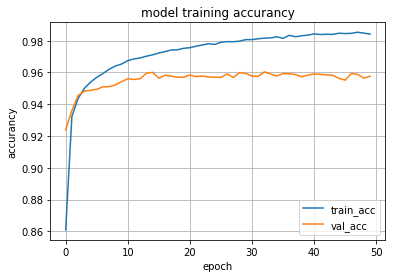

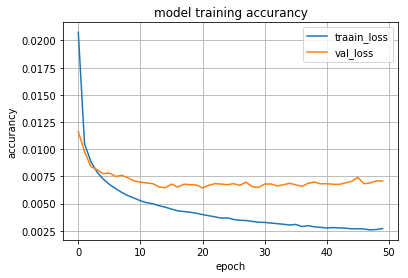

In [28]:
plt.plot(MODEL4.history['acc'])
plt.plot(MODEL4.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL4.history['loss'])
plt.plot(MODEL4.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_4 confusion_matrix

In [29]:
y_predict = model_4.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 962,    0,    1,    1,    1,    2,    4,    4,    3,    2],
       [   1, 1117,    5,    4,    0,    1,    1,    2,    4,    0],
       [   8,    2,  988,    5,    4,    0,    5,   11,    9,    0],
       [   1,    0,    5,  963,    1,   15,    0,   13,   11,    1],
       [   2,    2,    9,    0,  931,    0,   10,    3,    3,   22],
       [   2,    0,    0,   16,    5,  848,   12,    0,    6,    3],
       [   9,    3,    4,    2,    3,    6,  927,    0,    4,    0],
       [   1,    5,   16,    5,    0,    2,    0,  987,    5,    7],
       [  11,    3,    5,   13,    7,    8,    5,    6,  911,    5],
       [   3,    3,    0,    5,   19,   11,    0,   11,   15,  942]],
      dtype=int64)

# model_5: 
# hidden_dim = 50
# hidden_layers = 4 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [30]:
model_5 = Sequential()
model_5.add(Dense(50, input_dim=784))
model_5.add(Activation('relu'))
model_5.add(Dense(50, input_dim=784))
model_5.add(Activation('relu'))
model_5.add(Dense(50, input_dim=784))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))
model_5.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_14 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_15 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
__________

In [31]:
MODEL5 = model_5.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.0164 - acc: 0.8898 - val_loss: 0.0092 - val_acc: 0.9403
Epoch 2/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.0078 - acc: 0.9493 - val_loss: 0.0072 - val_acc: 0.9544
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0062 - acc: 0.9596 - val_loss: 0.0061 - val_acc: 0.9610
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0051 - acc: 0.9674 - val_loss: 0.0055 - val_acc: 0.9658
Epoch 5/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.0045 - acc: 0.9710 - val_loss: 0.0049 - val_acc: 0.9688
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.0040 - acc: 0.9747 - val_loss: 0.0056 - val_acc: 0.9634
Epoch 7/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.0036 - acc: 0.9778 - val_loss: 0.0049 - val_acc

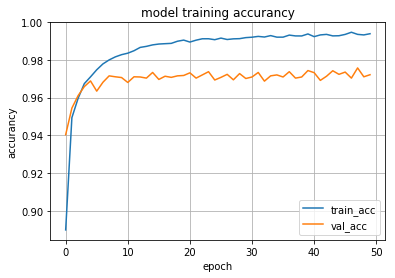

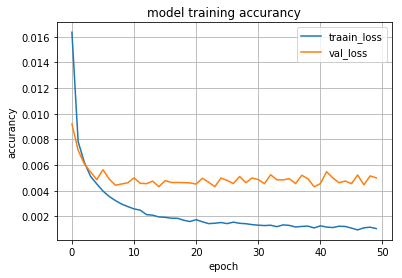

In [32]:
plt.plot(MODEL5.history['acc'])
plt.plot(MODEL5.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL5.history['loss'])
plt.plot(MODEL5.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_5 confusion_matrix

In [33]:
y_predict = model_5.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 968,    1,    2,    0,    2,    2,    3,    1,    1,    0],
       [   0, 1123,    2,    3,    1,    2,    2,    1,    1,    0],
       [   7,    2, 1002,    3,    6,    0,    1,    8,    2,    1],
       [   0,    1,    7,  977,    0,   12,    0,    5,    1,    7],
       [   0,    0,    0,    0,  963,    1,    4,    0,    0,   14],
       [   1,    0,    0,    4,    1,  871,    8,    2,    1,    4],
       [   6,    2,    2,    1,    5,    4,  935,    0,    3,    0],
       [   1,    4,   11,    2,    5,    0,    0,  991,    2,   12],
       [   5,    0,    4,    6,   10,   11,    4,    6,  919,    9],
       [   3,    2,    0,    5,   16,    3,    1,    5,    2,  972]],
      dtype=int64)

# model_6: 
# hidden_dim = 60
# hidden_layers = 4 
# epoch = 50
# Activation function: Relu
# Optimizer: Adam(lr=0.001beta_1=0.9, beta_2=0.999,            epsilon=None, decay=0.0, amsgrad=False)
# Normalization: Yes

In [49]:
model_6 = Sequential()
model_6.add(Dense(60, input_dim=784))
model_6.add(Activation('relu'))
model_6.add(Dense(60, input_dim=784))
model_6.add(Activation('relu'))
model_6.add(Dense(60, input_dim=784))
model_6.add(Activation('relu'))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))
model_6.compile(loss='mse',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['acc'])
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 60)                47100     
_________________________________________________________________
activation_30 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 60)                3660      
_________________________________________________________________
activation_31 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 60)                3660      
_________________________________________________________________
activation_32 (Activation)   (None, 60)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                610       
__________

In [50]:
MODEL6 = model_6.fit(x_train_n,y_train,batch_size=64,epochs=50,verbose =1,validation_data = (x_test_n,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.0151 - acc: 0.8994 - val_loss: 0.0092 - val_acc: 0.9393
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0072 - acc: 0.9535 - val_loss: 0.0064 - val_acc: 0.9584
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.0055 - acc: 0.9643 - val_loss: 0.0056 - val_acc: 0.9638
Epoch 4/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0046 - acc: 0.9703 - val_loss: 0.0053 - val_acc: 0.9660
Epoch 5/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0040 - acc: 0.9748 - val_loss: 0.0047 - val_acc: 0.9696
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.0035 - acc: 0.9778 - val_loss: 0.0060 - val_acc: 0.9627
Epoch 7/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0032 - acc: 0.9796 - val_loss: 0.0046 - val_acc

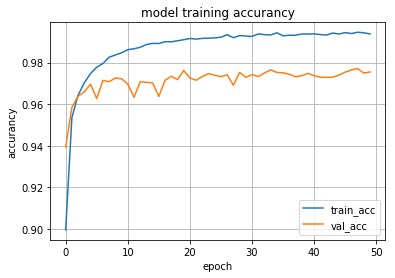

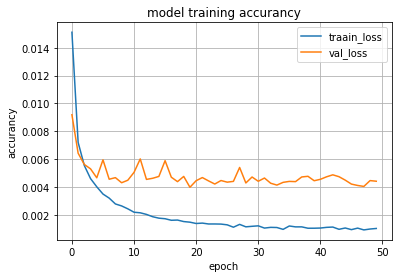

In [51]:
plt.plot(MODEL6.history['acc'])
plt.plot(MODEL6.history['val_acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(MODEL6.history['loss'])
plt.plot(MODEL6.history['val_loss'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['traain_loss', 'val_loss'],loc='best')
plt.grid()
plt.show()

# model_6 confusion_matrix

In [52]:
y_predict = model_6.predict_classes(x_test_n)
y_predict = np_utils.to_categorical(y_predict,10)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 971,    0,    1,    0,    0,    1,    3,    1,    3,    0],
       [   0, 1125,    2,    1,    0,    2,    2,    1,    2,    0],
       [   5,    2, 1001,    3,    0,    0,    5,    6,    9,    1],
       [   0,    1,    8,  982,    0,    5,    0,    5,    5,    4],
       [   0,    0,    5,    0,  942,    1,    4,    6,    1,   23],
       [   1,    1,    0,   11,    0,  866,    5,    1,    3,    4],
       [   4,    2,    0,    0,    2,    3,  947,    0,    0,    0],
       [   1,    4,   11,    6,    2,    0,    0,  996,    1,    7],
       [   3,    0,    4,    4,    2,    8,    6,    4,  940,    3],
       [   2,    2,    1,    3,    4,    5,    0,    4,    3,  985]],
      dtype=int64)

In [53]:
score = model_1.evaluate(x_test,y_test)
print(f'model_1 loss:{score[0]}, accurancy:{score[1]}')
score = model_2.evaluate(x_test_n,y_test)
print(f'model_2 loss:{score[0]}, accurancy:{score[1]}')
score = model_3.evaluate(x_test_n,y_test)
print(f'model_3 loss:{score[0]}, accurancy:{score[1]}')
score = model_4.evaluate(x_test_n,y_test)
print(f'model_4 loss:{score[0]}, accurancy:{score[1]}')
score = model_5.evaluate(x_test_n,y_test)
print(f'model_5 loss:{score[0]}, accurancy:{score[1]}')
score = model_6.evaluate(x_test_n,y_test)
print(f'model_6 loss:{score[0]}, accurancy:{score[1]}')

10000/10000 [==============================] - 0s 41us/step
model_1 loss:0.015096990296989679, accurancy:0.9011
10000/10000 [==============================] - 1s 51us/step
model_2 loss:0.008690327123296447, accurancy:0.944
10000/10000 [==============================] - 0s 41us/step
model_3 loss:0.00708592696932451, accurancy:0.9556
10000/10000 [==============================] - 0s 40us/step
model_4 loss:0.007064933010914764, accurancy:0.9576
10000/10000 [==============================] - 1s 51us/step
model_5 loss:0.005008653583327002, accurancy:0.9721
10000/10000 [==============================] - 0s 49us/step
model_6 loss:0.004424383422177797, accurancy:0.9755


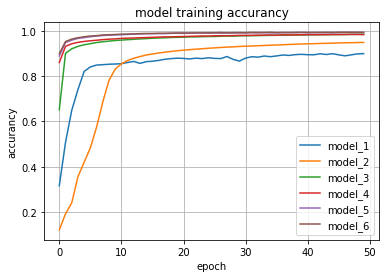

In [54]:
plt.plot(MODEL1.history['acc'])
plt.plot(MODEL2.history['acc'])
plt.plot(MODEL3.history['acc'])
plt.plot(MODEL4.history['acc'])
plt.plot(MODEL5.history['acc'])
plt.plot(MODEL6.history['acc'])
plt.title('model training accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

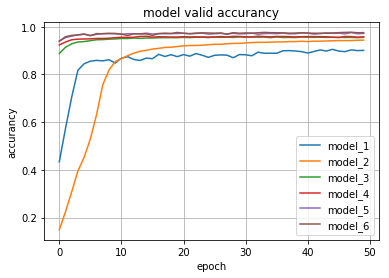

In [55]:
plt.plot(MODEL1.history['val_acc'])
plt.plot(MODEL2.history['val_acc'])
plt.plot(MODEL3.history['val_acc'])
plt.plot(MODEL4.history['val_acc'])
plt.plot(MODEL5.history['val_acc'])
plt.plot(MODEL6.history['val_acc'])
plt.title('model valid accurancy')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

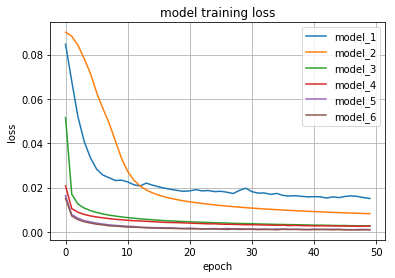

In [56]:
plt.plot(MODEL1.history['loss'])
plt.plot(MODEL2.history['loss'])
plt.plot(MODEL3.history['loss'])
plt.plot(MODEL4.history['loss'])
plt.plot(MODEL5.history['loss'])
plt.plot(MODEL6.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()

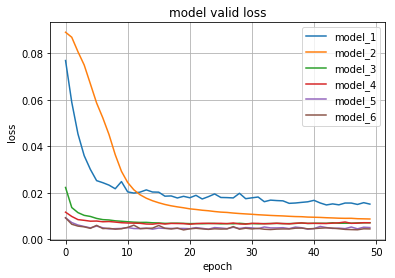

In [57]:
plt.plot(MODEL1.history['val_loss'])
plt.plot(MODEL2.history['val_loss'])
plt.plot(MODEL3.history['val_loss'])
plt.plot(MODEL4.history['val_loss'])
plt.plot(MODEL5.history['val_loss'])
plt.plot(MODEL6.history['val_loss'])
plt.title('model valid loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5','model_6'],loc='best')
plt.grid()
plt.show()